<a href="https://colab.research.google.com/github/Pranali-25/Capstone-Project/blob/main/4_Transformers_in_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRANSFORMERS IN DEEP LEARNING**

Transformer is a neural network architecture used for performing machine learning tasks.Transformer Architecture is a model that uses self-attention that transforms one whole sentence into a single sentence. This is a big shift from how older models work step by step, and it helps overcome the challenges seen in models like RNNs and LSTMs.

Transformer models work by processing input data, which can be sequences of tokens or other structured data, through a series of layers that contain self-attention mechanisms and feedforward neural networks.

# **1.Install necessary libraries**

First, We need to install some necessary libraries such as PyTorch and matplotlib.

In [ ]:
pip install torch matplotlib


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

# **2.Implementing the Transformer Model**

Firstly, We will define the simple transformer model then creating the model,loss function and optimizer.Lastly, For traing the model we will prepare the dummy data.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define a simple Transformer model
class SimpleTransformer(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim):
        super(SimpleTransformer, self).__init__()
        self.embedding = nn.Embedding(input_dim, model_dim)
        self.transformer = nn.Transformer(d_model=model_dim, nhead=num_heads, num_encoder_layers=num_layers, num_decoder_layers=num_layers)
        self.fc = nn.Linear(model_dim, output_dim)

    def forward(self, src, tgt):
        src = self.embedding(src)
        tgt = self.embedding(tgt)
        output = self.transformer(src, tgt)
        output = self.fc(output)
        return output

# Hyperparameters
input_dim = 10
model_dim = 16
num_heads = 2
num_layers = 2
output_dim = 10
seq_length = 5

# Create the model, loss function, and optimizer
model = SimpleTransformer(input_dim, model_dim, num_heads, num_layers, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Dummy data for training
src = torch.randint(0, input_dim, (seq_length, 1))
tgt = torch.randint(0, input_dim, (seq_length, 1))
labels = torch.randint(0, output_dim, (seq_length, 1))

# Train the model (simple example, just one step for demonstration)
model.train()
optimizer.zero_grad()
output = model(src, tgt)
loss = criterion(output.view(-1, output_dim), labels.view(-1))
loss.backward()
optimizer.step()

print("Training step completed.")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Training step completed.


# **3.Visualize Attention Weights**

To visualize the attention weights, we'll use a custom plotting function. Note in a real application, We have to extract the attention weights from the transformer model during the forward pass. Here, For simplicity, We have uses random weights.

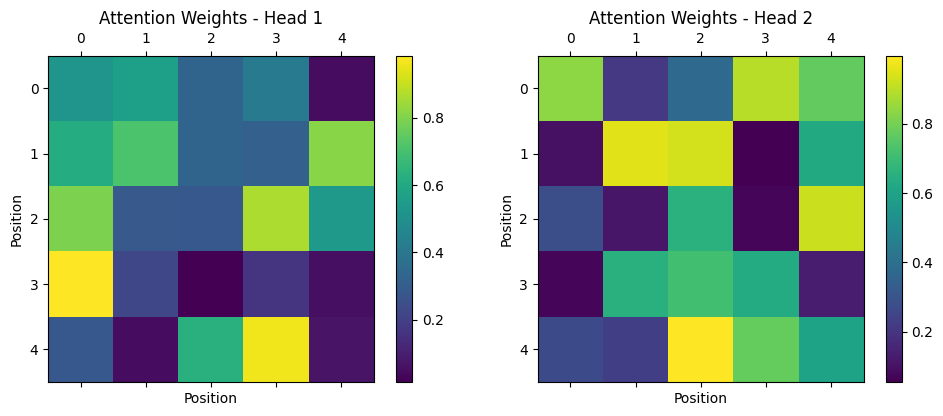

In [ ]:
def plot_attention_weights(attention_weights):
    num_heads = attention_weights.shape[0]

    fig, axes = plt.subplots(1, num_heads, figsize=(10, 4))
    # Create subplots for each head

    for head in range(num_heads):
        cax = axes[head].matshow(attention_weights[head], cmap='viridis')
        fig.colorbar(cax, ax=axes[head])

        axes[head].set_xlabel('Position')
        axes[head].set_ylabel('Position')
        axes[head].set_title(f'Attention Weights - Head {head+1}')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Generate dummy attention weights for visualization
num_heads = 2
seq_length = 5
attention_weights = torch.rand(num_heads, seq_length, seq_length)

# Plot the attention weights
plot_attention_weights(attention_weights)

# **CONCLUSION**

We have successfully defined a simple transformer model,implemented the transformer model,performed a single training step with dummy data, and plotted random attention weights for visualization purposes.